# Define scene collections

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# - - - - - - - - - - - - - - - - - - - - 
# DEFAULT IMPORTS - IN ALL NOTEBOKS
from src import configs

prjconf = configs.ProjectConfigParser()

# - - - - - - - - - - - - - - - - - - - - 
# NOTEBOOK SPECIFIC IMPORTS
import numpy as np
from pathlib import Path
import pandas as pd
import rasterio
from tqdm import tqdm 

import nasa_hls

## Select scenes for a scene collection

### Create dataframe with all scenes

In [13]:
scenelist = pd.DataFrame(list(prjconf.get_path("Interim", "hls").glob("*")), columns=["sdir"])
scenelist["sid"] = scenelist["sdir"].apply(lambda x: Path(x).stem)
scenelist = pd.concat([scenelist,
                       scenelist["sid"].str.split(".", expand=True) \
                       .loc[:, [1, 2, 3]] \
                       .rename({1: "product", 2: "tile", 3: "date_Yj"}, axis=1)], axis=1)
scenelist["date"] = pd.to_datetime(scenelist["date_Yj"], format="%Y%j")

cc = []
for i, row in tqdm(scenelist.iterrows(), total=scenelist.shape[0]):
    hdf_path = prjconf.get_scene_hdf(date=row["date_Yj"], tile="32UNU", product="L30")
    cc.append(nasa_hls.get_cloud_coverage_from_hdf(hdf_path))
scenelist["cloud_cover"] = cc

display(scenelist.head())

100%|██████████| 67/67 [00:02<00:00, 31.40it/s]


,sdir,sid,product,tile,date_Yj,date,cloud_cover
0,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018355.v1,L30,T32UNU,2018355,2018-12-21,100.0
1,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018012.v1,L30,T32UNU,2018012,2018-01-12,86.0
2,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018204.v1,L30,T32UNU,2018204,2018-07-23,84.0
3,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018028.v1,L30,T32UNU,2018028,2018-01-28,100.0
4,/home/ben/Devel/Projects/classify-hls/data/int...,HLS.L30.T32UNU.2018300.v1,L30,T32UNU,2018300,2018-10-27,100.0


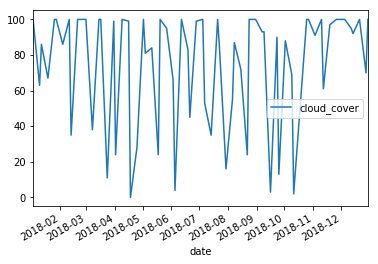

In [14]:
scenelist.plot(x="date", y="cloud_cover")